In [1]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.model_selection import train_test_split
import sklearn
from sklearn import tree
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier as ADC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import CategoricalNB
from sklearn.linear_model import LogisticRegression as LR
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import BallTree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV as GSearch
from imblearn.under_sampling import RandomUnderSampler 
import pickle


In [2]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.subplots as sp
from dash import Dash, dcc, html, Input, Output
from sklearn import tree

In [29]:
airline_df = pd.read_csv('./data/airline_data.csv')
airline_df.dropna(inplace=True)
airline_df.reset_index(drop=True, inplace=True)
airline_df = pd.get_dummies(airline_df, prefix = None, prefix_sep = '_', dummy_na = False, columns = ['satisfaction','Gender', 'Customer Type', 'Type of Travel', 'Class'], sparse = False, drop_first = False, dtype = None)
columns_drop = ['id', 'Unnamed: 0.1', 'Unnamed: 0', 'satisfaction_neutral or dissatisfied', 'Gender_Female', 'Customer Type_disloyal Customer', 'Type of Travel_Personal Travel']
airline_df.drop(columns_drop, axis=1, inplace = True)


In [25]:
airline_df.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction_satisfied,Gender_Male,Customer Type_Loyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,13,460,3,4,3,1,5,3,5,5,...,25,18.0,0,1,1,0,1,0,0,1
1,25,235,3,2,3,3,1,3,1,1,...,1,6.0,0,1,0,1,0,1,0,0
2,26,1142,2,2,2,2,5,5,5,5,...,0,0.0,1,0,1,1,0,1,0,0
3,25,562,2,5,5,5,2,2,2,2,...,11,9.0,0,0,1,1,0,1,0,0
4,61,214,3,3,3,3,4,5,5,3,...,0,0.0,1,1,1,1,0,1,0,0


In [5]:
airline_df.isnull().sum()

Age                                  0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction_satisfied               0
Gender_Female                        0
Gender_Male                          0
Customer Type_Loyal Customer         0
Customer Type_disloyal Customer      0
Type of Travel_Business travel       0
Type of Travel_Personal Travel       0
Class_Business           

In [30]:
airline_df.columns

25

In [31]:
airline_df.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction_satisfied,Gender_Male,Customer Type_Loyal Customer,Type of Travel_Business travel,Class_Business,Class_Eco,Class_Eco Plus
0,13,460,3,4,3,1,5,3,5,5,...,5,25,18.0,0,1,1,0,0,0,1
1,25,235,3,2,3,3,1,3,1,1,...,1,1,6.0,0,1,0,1,1,0,0
2,26,1142,2,2,2,2,5,5,5,5,...,5,0,0.0,1,0,1,1,1,0,0
3,25,562,2,5,5,5,2,2,2,2,...,2,11,9.0,0,0,1,1,1,0,0
4,61,214,3,3,3,3,4,5,5,3,...,3,0,0.0,1,1,1,1,1,0,0


In [32]:
airline_df.dropna(inplace=True)
airline_df.reset_index(drop=True, inplace=True)

In [33]:
reduced_df = airline_df.sample(frac=0.10, random_state=42)
reduced_df.shape

(12949, 25)

In [34]:
reduced_df.satisfaction_satisfied.value_counts()

0    7323
1    5626
Name: satisfaction_satisfied, dtype: int64

In [35]:
target = reduced_df['satisfaction_satisfied']

In [36]:
input_columns = reduced_df.loc[:, airline_df.columns != "satisfaction_satisfied"]

In [13]:
input_columns.shape

(12949, 27)

In [37]:
x_train, x_test, y_train, y_test = train_test_split(input_columns, target, stratify=target, train_size=0.8)

Accuracy: 0.866023166023166
Precision: 0.8791423001949318


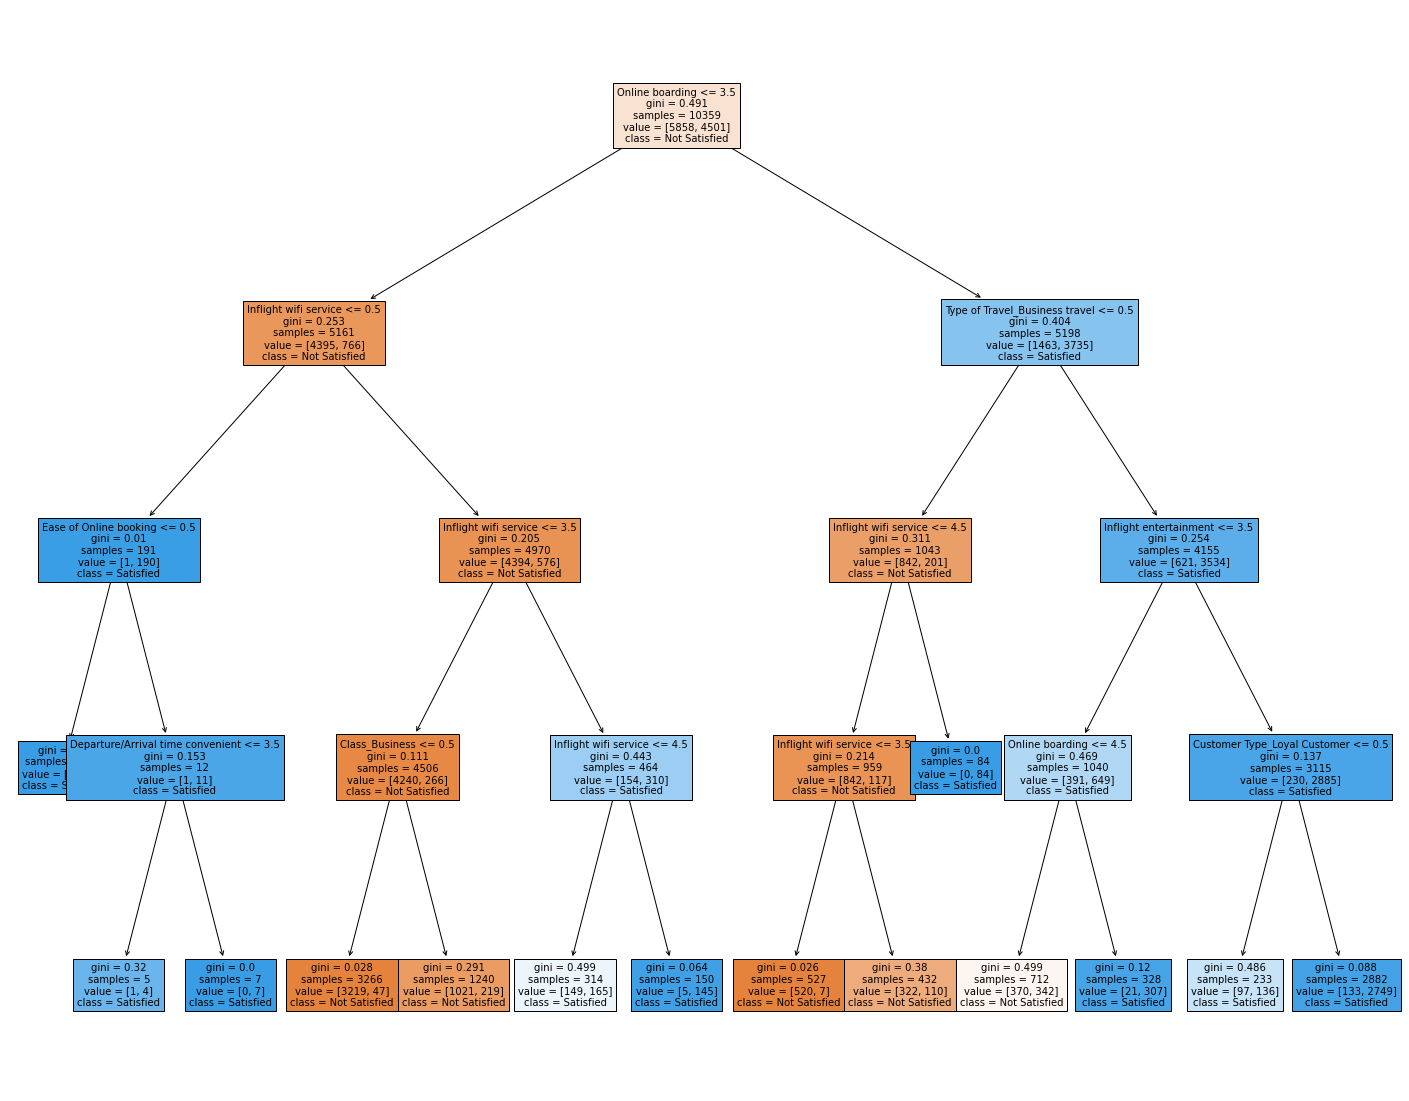

In [44]:
tree_clf = DecisionTreeClassifier(ccp_alpha=0, max_depth=4, min_samples_leaf=5, min_samples_split=2, min_weight_fraction_leaf=0.0)
tree_clf = tree_clf.fit(x_train, y_train)
pred_tree = tree_clf.predict(x_test)

#Also change max depth as well :) Great work
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(tree_clf,
                   feature_names=input_columns.columns,  
                   class_names=['Not Satisfied','Satisfied'],
                   filled=True, fontsize=10)
plt.savefig('tree.jpg',bbox_inches = "tight")
print("Accuracy:", accuracy_score(y_test, pred_tree))
print("Precision:", precision_score(y_test, pred_tree))


In [45]:
pickle.dump(tree_clf, open('model.pkl','wb'))

In [46]:
model = pickle.load(open('model.pkl','rb'))


In [51]:
print(model.predict([[ 50, 100,   5, 5,   2,   4,   2,   1,   4,   4,   4,   4,   4,   4,   4,
    4,   4,   0,   0,   0,   1,   1,   1,   1]])[0])

1


/projects/72aec78b-4035-4aa5-8faa-4d7af1533e7b/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [52]:
print(x_train.columns)

Index(['Age', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'Gender_Male', 'Customer Type_Loyal Customer',
       'Type of Travel_Business travel', 'Class_Business', 'Class_Eco',
       'Class_Eco Plus'],
      dtype='object')


In [15]:
params = {'min_samples_split': list(range(1,7)), 'min_samples_leaf': list(range(1,7)), 'min_weight_fraction_leaf': [-3.0,-2.0,-1.0,0.0,1.0,2.0,3.0], 'max_depth': list(range(1,6)), 'ccp_alpha': [0,0,1.0,2.0,3.0]}

In [16]:
tree_gsearch = GSearch(DecisionTreeClassifier(), params, verbose=1, cv=2)

In [17]:
tree_gsearch.fit(x_train, y_train)

Fitting 2 folds for each of 6300 candidates, totalling 12600 fits


/projects/72aec78b-4035-4aa5-8faa-4d7af1533e7b/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
11100 fits failed out of a total of 12600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2100 fits failed with the following error:
Traceback (most recent call last):
  File "/projects/72aec78b-4035-4aa5-8faa-4d7af1533e7b/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/projects/72aec78b-4035-4aa5-8faa-4d7af1533e7b/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 969, in fit
    super().fit(
  File "/projects/72aec78b-4035-4aa5-8faa-4d7af1533e7b/.local/lib/python3

GridSearchCV(cv=2, estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': [0, 0, 1.0, 2.0, 3.0],
                         'max_depth': [1, 2, 3, 4, 5],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6],
                         'min_samples_split': [1, 2, 3, 4, 5, 6],
                         'min_weight_fraction_leaf': [-3.0, -2.0, -1.0, 0.0,
                                                      1.0, 2.0, 3.0]},
             verbose=1)

In [18]:
tree_gsearch.best_params_

{'ccp_alpha': 0,
 'max_depth': 5,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0}

In [19]:
from sklearn.tree import export_graphviz

export_graphviz( 
 tree_gsearch.best_estimator_,
 out_file=('airline_df'),
 feature_names=None,
 class_names=None,
 filled=True,
)

**Decision Tree:**

A decision tree is a graph that classifies items and whether it is true or false to the question in the box. In this example, we use satisfied for true and false for dissatisfied.



A Decision Tree Classifier makes various questions to help determine what group a variable falls into. It goes from the top to the bottom and depending on how a question is answered the variable goes down a path to a different leaf in the tree. It goes all the way down and at the end, it puts that variable into a group. The question splits the group of variables into two sections, dissatisfied or satisfied, depending on the question. For example, the root question asks if online boarding is less than or equal to 3.5, it'll be not satisfied, but if it's greater than 3.5, it'll be satisfied. 

- Disadvantages=lots of parameters
- Advantages=easy to understand



In [20]:
#svc = SVC()
#svc.fit(x_train, y_train)
#svc_pred = svc.predict(x_test)
#recall = sklearn.metrics.recall_score(y_test, svc_pred)
#precision = sklearn.metrics.precision_score(y_test, svc_pred)
#accuracy = sklearn.metrics.accuracy_score(y_test, svc_pred)
#f_measure = sklearn.metrics.f1_score(y_test, svc_pred)
#print("R: ", recall)
#print("P: ", precision)
#print("A: ", accuracy)
#print("F: ", f_measure)
